In [ ]:
# K - means clustering algorithm

In [1]:
#1) start with k centroids by putting them at random place. here k = 2
# Then find the distance from data point to centroid(clusters). which cluster belng to which data set .
#2) compute distance of every point from centroid and cluster them accordingly.
# then you adjust the centroids to the datasets so that its optimal to the data points and do it with all of the clusters. keep on repeating the same process untill none of the data point is changing the position from one cluster to another.
# how to determine what k value you should start with? the best possible way. the technique is called elbow method.
# for that we try to calculate some off square error (sse1= (from i=0 to n)distant(xi-c1))^2
# same for all of the clusters and then we add all the sse and then plot the graph, sse vs k, if it finds that the error is decreasing so it is optimal and fins the point where the graph is turning exponantinally hence thats a optimal point to take as a k.


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('D:\excel_files\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


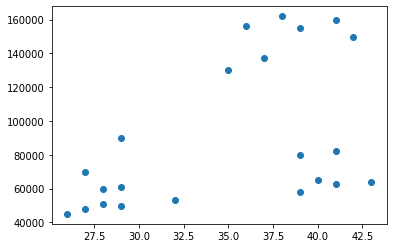

In [6]:
plt.scatter(df['Age'],df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [37]:
km.cluster_centers_  #centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

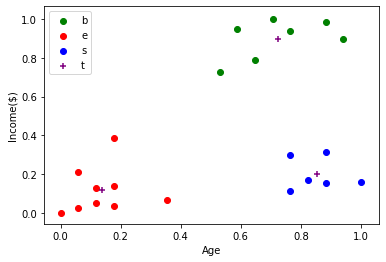

In [39]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color = 'green')
plt.scatter(df2.Age,df2['Income($)'],color = 'red')
plt.scatter(df3.Age,df3['Income($)'],color = 'blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '+',label = 'centroid')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend('best')

#this happend coz the scaling is not good enough thats why the clusters are like that, we need to do some preprocessing thats why we used minmaxscaler.


In [31]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df
#here the income and age 's range from 0 to 1 now.

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [33]:
km = KMeans(n_clusters =3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [34]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


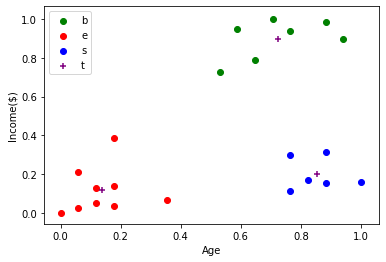

In [40]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color = 'green')
plt.scatter(df2.Age,df2['Income($)'],color = 'red')
plt.scatter(df3.Age,df3['Income($)'],color = 'blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '+',label = 'centroid')

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend('best')

In [41]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [42]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.21552563314755369,
 0.16858512236029755,
 0.13976844995388157,
 0.1099581688308657]

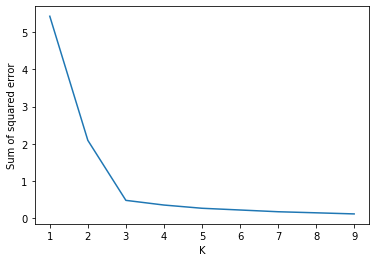

In [43]:
plt.xlabel('K')
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)

In [44]:
#Exercise
#use iris dataset, use petals (length and width) leave sepals
#1) use iris flower dataset from sklearn library and try to form clusters of flowers using petals width and length features. drop other two features for simplicity.
#2) figure out if any preprocessing such as scaling would help here
#3) draw elbow plot and from that figure out optimal value of k

In [45]:
#Naive Bayes classifier algo part-1

In [46]:
#basics of probability
#cinditional probability
#p(A/B) = p(B/A)*p(A)/ p(B)

In [47]:
# we gonna predict the survivours from the titanic , caste, race, fare and stuff .
#it is called naive coz we are making a naive assumption that the feautres such as male, age, class, fare etc.. are independent of each other.
#applications are - spam detector(email), hand written character recognization, weather forcasting, face recognition, news article characterization.


In [64]:
import pandas as pd
df = pd.read_csv('D:\\excel_files\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns',inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [82]:
target = df.Survived
inputs = df.drop('Survived', axis = 'columns')

In [83]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)


,female,male
0,0,1
1,1,0
2,1,0


In [84]:
inputs = pd.concat([inputs, dummies],axis = 'columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [85]:
inputs.drop('Sex',axis = 'columns',inplace = True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [86]:
inputs.columns[inputs.isna().any()] #if there are any NA values in the dataset.

Index(['Age'], dtype='object')

In [87]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [90]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

#handling Na values will filling the mean of the vlues.

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size = 0.2)

In [94]:
len(x_train)

712

In [95]:
len(x_test)

179

In [96]:
len(inputs)

891

In [103]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#we use gaussian naive bayes when your data distribution is normal.

In [104]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [105]:
model.score(x_test,y_test)

0.8212290502793296

In [106]:
x_test[:10]

,Pclass,Age,Fare,female,male
696,3,44.000000,8.0500,0,1
559,3,36.000000,17.4000,1,0
889,1,26.000000,30.0000,0,1
805,3,31.000000,7.7750,0,1
379,3,19.000000,7.7750,0,1
795,2,39.000000,13.0000,0,1
219,2,30.000000,10.5000,0,1
86,3,16.000000,34.3750,0,1
384,3,29.699118,7.8958,0,1
538,3,29.699118,14.5000,0,1


In [107]:
y_test[:10]

696    0
559    1
889    1
805    0
379    0
795    0
219    0
86     0
384    0
538    0
Name: Survived, dtype: int64

In [108]:
model.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
model.predict_proba(x_test[:10])

array([[0.98751772, 0.01248228],
       [0.08000344, 0.91999656],
       [0.90095698, 0.09904302],
       [0.98602079, 0.01397921],
       [0.98334562, 0.01665438],
       [0.97404715, 0.02595285],
       [0.97151535, 0.02848465],
       [0.9803149 , 0.0196851 ],
       [0.98580675, 0.01419325],
       [0.98598048, 0.01401952]])

In [110]:
#Naive Bayes algo part-2

In [111]:
import pandas as pd
df = pd.read_csv("D:\excel_files\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df.groupby('Category').describe() #how many are spam and legit

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [113]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size = 0.25)

In [115]:
len(x_train)

4179

In [116]:
len(x_test)

1393

In [117]:
#we still have message column to convert into number since ml works on integer values.
#to do that we have a method called count - vectoriser technique.
#in this we take take distnct words from the message which will be our columns and the count of the words came in the message will be counted there .


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train) #here x_train_count is the column where the message column is converted into the count of word, matrix.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [125]:
x_test_count = v.transform(x_test)
model.score(x_test_count,y_test)

0.9813352476669059

In [128]:
#the above code will be simpler with the pipeline method.

from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])


In [129]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [130]:
clf.score(x_test,y_test)

0.9813352476669059

In [132]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [133]:
#Exercise
#use wine dataset from skelarn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train.
#After that train the model using gaussian and multinomial classifier and post which performs better. use the trained model to perform some predictions on test data.

In [134]:
#Hyper parameter tuning(GridSearchCV)


In [141]:
from sklearn import svm,datasets
iris = datasets.load_iris()

In [142]:
import pandas as pd
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.3)

In [149]:
len(x_train)

105

In [150]:
len(x_test)

45

In [151]:
#first using with svm
model = svm.SVC(kernel = 'rbf',C=30,gamma = 'auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9333333333333333

In [152]:
#this split method is not that efficient since the dataset it changing every time we run it again.
#so thats why we use k fold method.
#we can use crodd val for calculating the score of every fold in k fold.

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
cross_val_score(svm.SVC(kernel = 'linear',C=10,gamma = 'auto'),iris.data,iris.target,cv = 5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [155]:
cross_val_score(svm.SVC(kernel = 'rbf',C=10,gamma = 'auto'),iris.data,iris.target,cv = 5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [156]:
cross_val_score(svm.SVC(kernel = 'rbf',C=20,gamma = 'auto'),iris.data,iris.target,cv = 5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [159]:
#how many times you gonna keep changing the values of kernel and c to get the optimal result.
#for that we can use for loop
#this way we can find the optimal core by hyper tuning
import numpy as np
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel = kval,C = cval,gamma = 'auto'),iris.data,iris.target,cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)
avg_scores        

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [160]:
#but this method is also having some problems , like if we have 4 parameters then we have to run 4 for loops which will  be very lengthy(iterations.
# for that we can use GridSearchCV, this performs the same task as above.


In [161]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma = 'auto'),{
    'C': [1,10,20],
    'kernel': ['rbf','linear']
},cv =5, return_train_score = False)

clf.fit(iris.data,iris.target)
clf.cv_results_

#you can pass as much parameters in clf area.

{'mean_fit_time': array([0.00139441, 0.00080061, 0.00138998, 0.00079699, 0.0011972 ,
        0.00100279]),
 'std_fit_time': array([4.90855545e-04, 4.00347974e-04, 4.86243057e-04, 3.98501072e-04,
        3.98707458e-04, 1.13393039e-05]),
 'mean_score_time': array([0.00059819, 0.00079503, 0.00060244, 0.00019956, 0.00079808,
        0.00059228]),
 'std_score_time': array([0.00048842, 0.00039755, 0.00049194, 0.00039911, 0.00039904,
        0.00048371]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [163]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001394,0.000491,0.000598,0.000488,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000801,0.000400,0.000795,0.000398,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001390,0.000486,0.000602,0.000492,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000797,0.000399,0.000200,0.000399,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001197,0.000399,0.000798,0.000399,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001003,0.000011,0.000592,0.000484,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [165]:
df[['param_C','param_kernel','mean_test_score']]

#this way it will be simpler just pass the parameters in the kernel and c area and gridsearchcv will do al the permutation and combination to find the optimal result.

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [167]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score

In [168]:
clf.best_score_

0.9800000000000001

In [169]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [170]:
# there is a problem with gridseachcv, the computation cost will be higher if we have to deal with a complex dataset then the parameters will be large and gridsearchcv will actually use all the parmutation and combination and hence the computation cost will be high.
#for that to tackle sklearn have a class named randomizedcv, it will not try every single permutation but it will take some randomly.

In [179]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(svm.SVC(gamma = 'auto'),{
    'C': [1,10,20],
    'kernel': ['rbf','linear']
     },
     cv =5, 
     return_train_score = False,
     n_iter = 2
)

rs.fit(iris.data,iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.98
1,1,rbf,0.98


In [180]:
#this is best way to try randomly dataset if you run it again and again it changes the values byt randomly choosing the paramters.
#this is hypertuning
#now how to decide which model is best for the dataset.


In [181]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [183]:
model_params = {
    'svm': {
        'model':svm.SVC(gamma = 'auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [186]:
scores = []
for model_name,mp in model_params.items() :
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
#this for loop is going through every dictonary values(model) and its parameters one by one , using gridsearchcv, the first argument is the classifier(the model) and second argument is the parameters.

In [187]:
df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


In [188]:
#this goes best for practical use, most people uswe this way to choose the best model for the particular dataset.
#we have used 3 right now to choose from but you can choose as many as you want to have more options to choose from.

In [189]:
#Exercise: Machine learning finding optimal model and hyperparameters
#for digits dataset in sklearn.dataset, please try following classifiers and find out the one that gives best performance. also, find the optimal parameters for that classifier.

#from sklearn import svm
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import multinomialNB
#from sklearn.tree import DecisionTreeClassifier

In [190]:
#L1 and L2 regularization | Lasso, Ridge regression

In [191]:
#overfitting issue is normal in machine learning, l1 and l2 regularization is somewhat helps in that and helps in enhancing the accuracy as well.
#underfit(where you just make a line where it passes most of the points of your dataset), overfit(in overfit it is something which makes a line passing through every single data points of the dataset), balance fit(in this it is the balance between underfit and overfit )
#underfit - (match won= thetha 0+ thetha 1 * age)
#overfit - (match won = thetha 0 + thetha1*age + thethe2*age^2 + thetha3*age^3 + thetha4*age^4)
#balance fit - (match won = thetha0 + thetha1*age + thetha2*age^2)


#to handle the overfit data if we can somehow shrink tha parameters and make the equation equal to balance fit that would be nice.
#to handle that we can use mean squared error.  (mse = 1/n(sum from 1 to n (yi - h thetha(xi))^2)) where h thetha(xi) = thetha0 + thetha1x1 + thetha2x2^2 + thetha3x3^3..... we have to minimize the error value.
#L2 regularization, (mse = 1/n (sum from 1 to n)(yi - h thetha(xi))^2 + lembda (sum from 1 to n)(thetha i)^2) where h thetha(xi) = thetha0 + thetha1x1 + thetha2x2^2 + thetha3x3^3.
#L1 regularization , (mse = 1/n (sum from 1 to n)(yi - h thetha(xi))^2 + lembda (sum from 1 to n)|thetha i|) where h thetha(xi) = thetha0 + thetha1x1 + thetha2x2^2 + thetha3x3^3




In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#supress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')


dataset = pd.read_csv('D:\excel_files\Melbourne_housing_FULL.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [195]:
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [196]:
dataset.shape

(34857, 21)

In [198]:
cols_to_use = ['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [199]:
dataset.shape

(34857, 15)

In [200]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [201]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [202]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())


In [203]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [205]:
dataset.dropna(inplace = True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [206]:
#dummy columns, removing char data

dataset = pd.get_dummies(dataset,drop_first = True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
x = dataset.drop('Price',axis = 1)
y = dataset['Price']

In [224]:
from sklearn.model_selection import train_test_split
train_x,train_y,test_x,test_y = train_test_split(x,y,test_size = 0.3,random_state = 2)

                                                 

In [223]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x,train_y)

ValueError: Found input variables with inconsistent numbers of samples: [19070, 8174]

In [225]:
reg.score(test_x,test_y)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [226]:
reg.score(train_x,train_y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [227]:
#here it is overfitted since the score of trained data is more than the test data.
#L1 regularization

In [230]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)
lasso_reg.fit(train_x,train_y)

ValueError: Found input variables with inconsistent numbers of samples: [19070, 8174]

In [ ]:
lasso_reg.score(test_x,test_y)

In [ ]:
lasso_reg.score(train_x,train_y)

In [231]:
#L2 regularization
#it is called ridge regression

In [232]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100,tol = 0.1)
ridge_reg.fit(train_x,train_y)

ValueError: Found input variables with inconsistent numbers of samples: [19070, 8174]

In [233]:
ridge_reg.score(test_x,test_y)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
ridge_reg.score(train_x,train_y)